# Subject: Classical Data Analysis

## Session 4 - Working with Geopandas and ArcGIS Online

### Exercise 1 -  Interception Operation for Land Use and Land Cover and Barcelona districts

Installing GeoPandas

To install the released version, you can use pip:

http://geopandas.org/install.html

*pip install geopandas*

or you can install the conda package from the conda-forge channel:

*conda install -c conda-forge geopandas*

Dependencies

Installation via conda should also install all dependencies, but a complete list is as follows:

- numpy
- pandas (version 0.15.2 or later)
- shapely
- fiona
- pyproj

In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [2]:
from shapely.geometry import shape,Point,Polygon,mapping

## 1. Load shapefiles

### 1.1. Load the "Barcelona districts " shapefile

In [3]:
shp1 = "Y:/GitHub/BTS_MasterInBigData-Francisco/Session_4_CDA/Barcelona_districts.shp"

In [5]:
df_bcn_dist = gpd.read_file(shp1)

In [6]:
df_bcn_dist.head()

,cartodb_id,dones,homes,web_4,web_3,web_2,web_1,n_barri,c_barri,n_distri,c_distri,coord_y,coord_x,perim,area,geometry
0,1,21850,26553,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/ciutatvella,el Raval,01,Ciutat Vella,01,4.581363e+06,430732.006258,5557.372878,1.098393e+06,"POLYGON ((2.171192824800411 41.38659469413268,..."
1,11,20693,20213,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/sants-montjuic,el Poble Sec,11,Sants-MontjuÃ¯c,03,4.579869e+06,429693.647708,9956.448009,4.604541e+06,"POLYGON ((2.150965984865441 41.37641964877194,..."
2,22,2397,2269,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/sarria-santgervasi,"Vallvidrera, el Tibidabo i les Planes",22,SarriÃ -Sant Gervasi,05,4.585950e+06,423973.042970,34375.351100,1.152241e+07,(POLYGON ((2.073267395167333 41.41382817352449...
3,34,4729,4170,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/horta-guinardo,Can BarÃ³,34,Horta-GuinardÃ³,07,4.585564e+06,430095.903925,4346.842889,3.837347e+05,"POLYGON ((2.168444030656322 41.41657572184046,..."
4,37,16537,15306,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/horta-guinardo,el Carmel,37,Horta-GuinardÃ³,07,4.586124e+06,429562.860855,6200.748289,9.415838e+05,"POLYGON ((2.159485805207417 41.42671610208185,..."


In [7]:
df_bcn_dist.crs # check the Cordinate system (CRS)

{'init': 'epsg:4326'}

In [8]:
selected_cols_bcn_dist = ['n_barri', 'n_distri', 'geometry']

In [9]:
df_bcn_dist_2 = df_bcn_dist[selected_cols_bcn_dist]
df_bcn_dist_2.head()

,n_barri,n_distri,geometry
0,el Raval,Ciutat Vella,"POLYGON ((2.171192824800411 41.38659469413268,..."
1,el Poble Sec,Sants-MontjuÃ¯c,"POLYGON ((2.150965984865441 41.37641964877194,..."
2,"Vallvidrera, el Tibidabo i les Planes",SarriÃ -Sant Gervasi,(POLYGON ((2.073267395167333 41.41382817352449...
3,Can BarÃ³,Horta-GuinardÃ³,"POLYGON ((2.168444030656322 41.41657572184046,..."
4,el Carmel,Horta-GuinardÃ³,"POLYGON ((2.159485805207417 41.42671610208185,..."


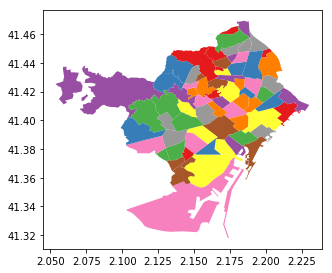

In [10]:
df_bcn_dist_2.plot(column='n_barri', cmap='Set1', figsize=(5, 5))

### 1.2. Load the "Corine Land Cover of Barcelona" shapefile

In [11]:
shp2 = "Y:/GitHub/BTS_MasterInBigData-Francisco/Session_4_CDA/CLC12_Barcelona.shp"

In [12]:
df_clc_dist = gpd.read_file(shp2)

In [13]:
df_clc_dist.head()

,OBJECTID,CLC_CODE,Level1,Level2,Level3,Area,Per3D,geometry
0,1,112,Artificial surfaces,Urban fabric,Discontinuous urban fabric,65.677140,6524.660900,POLYGON Z ((2.146360960511865 41.3554683458670...
1,2,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,715.589775,21306.505708,(POLYGON Z ((2.142555145569233 41.347187685652...
2,3,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,0.309275,225.092200,POLYGON Z ((2.107920993569771 41.3799034660792...
3,4,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,65.505163,4865.110863,POLYGON Z ((2.122246031185429 41.3867973490756...
4,5,122,Artificial surfaces,"Industrial, commercial and transport units",Road and rail networks and associated land,96.234388,10392.731116,POLYGON Z ((2.146733919043439 41.3457927478894...


In [14]:
df_clc_dist.crs # check the Cordinate system (CRS)

{'init': 'epsg:4326'}

In [15]:
df_bcn_dist.crs == df_clc_dist.crs # check if the the Cordinate systems (CRS) of both shapefiles are equal.

True

In [18]:
selected_cols_bcn_clc = ['CLC_CODE', 'Level1', 'Level2', 'Level3', 'Area', 'geometry']

In [19]:
df_clc_dist_2 = df_clc_dist[selected_cols_bcn_clc]
df_clc_dist_2.head()

,CLC_CODE,Level1,Level2,Level3,Area,geometry
0,112,Artificial surfaces,Urban fabric,Discontinuous urban fabric,65.677140,POLYGON Z ((2.146360960511865 41.3554683458670...
1,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,715.589775,(POLYGON Z ((2.142555145569233 41.347187685652...
2,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,0.309275,POLYGON Z ((2.107920993569771 41.3799034660792...
3,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,65.505163,POLYGON Z ((2.122246031185429 41.3867973490756...
4,122,Artificial surfaces,"Industrial, commercial and transport units",Road and rail networks and associated land,96.234388,POLYGON Z ((2.146733919043439 41.3457927478894...


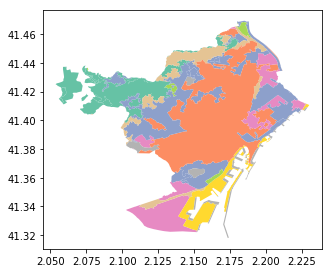

In [20]:
df_clc_dist_2.plot(column='Level3', cmap='Set2',  figsize=(5, 5))

## 2. Intersection operation

These two GeoDataFrames have some overlapping areas:

When using how='intersection', it returns only those geometries that are contained by both GeoDataFrames:

In [24]:
res_intersection = gpd.overlay(df_bcn_dist_2, df_clc_dist_2, how='intersection')
res_intersection.head()

,n_barri,n_distri,CLC_CODE,Level1,Level2,Level3,Area,geometry
0,la Marina del Prat Vermell,Sants-MontjuÃ¯c,523,Water bodies,Marine waters,Sea and ocean,180.427736,POLYGON Z ((2.173700037131697 41.3180910246230...
1,la Marina del Prat Vermell,Sants-MontjuÃ¯c,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,715.589775,POLYGON Z ((2.10988729347793 41.34013663320026...
2,la Marina del Prat Vermell,Sants-MontjuÃ¯c,122,Artificial surfaces,"Industrial, commercial and transport units",Road and rail networks and associated land,0.008954,POLYGON Z ((2.110103381929308 41.3401294884277...
3,la Marina del Prat Vermell,Sants-MontjuÃ¯c,122,Artificial surfaces,"Industrial, commercial and transport units",Road and rail networks and associated land,96.234388,POLYGON Z ((2.112987673447912 41.3412060750032...
4,la Marina del Prat Vermell,Sants-MontjuÃ¯c,523,Water bodies,Marine waters,Sea and ocean,180.427736,POLYGON Z ((2.152245786396936 41.3224931266741...


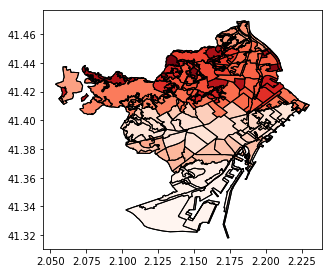

In [25]:
ax = res_intersection.plot(cmap='Reds',  figsize=(5, 5))

df_bcn_dist_2.plot(ax=ax, facecolor='none', edgecolor='k');

df_clc_dist_2.plot(ax=ax, facecolor='none', edgecolor='k');

## Task1: Calculate the frequency table of the "CLC_CODE" variable.

In [26]:
x=res_intersection

In [27]:
counts = x['CLC_CODE'].value_counts()
counts

111    147
112    118
141     88
312     58
121     47
523     46
323     40
123     25
122     22
231     20
311     19
142     11
313      2
Name: CLC_CODE, dtype: int64

## 3. Export the result as shapefile

First confirm the CRS. If it is not available, we have to define it.

In [28]:
res_intersection.crs == df_clc_dist.crs

False

In [29]:
# proj WGS84

res_intersection.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

To save the shapefile in the same folder where the notebook is hosted:

In [30]:
res_intersection.to_file('res_intersection.shp', driver='ESRI Shapefile')

Select and export the first 50 rows as a new shapefile:

In [32]:
selection = res_intersection[0:50]
selection

,n_barri,n_distri,CLC_CODE,Level1,Level2,Level3,Area,geometry
0,la Marina del Prat Vermell,Sants-MontjuÃ¯c,523,Water bodies,Marine waters,Sea and ocean,180.427736,POLYGON Z ((2.173700037131697 41.3180910246230...
1,la Marina del Prat Vermell,Sants-MontjuÃ¯c,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,715.589775,POLYGON Z ((2.10988729347793 41.34013663320026...
2,la Marina del Prat Vermell,Sants-MontjuÃ¯c,122,Artificial surfaces,"Industrial, commercial and transport units",Road and rail networks and associated land,0.008954,POLYGON Z ((2.110103381929308 41.3401294884277...
3,la Marina del Prat Vermell,Sants-MontjuÃ¯c,122,Artificial surfaces,"Industrial, commercial and transport units",Road and rail networks and associated land,96.234388,POLYGON Z ((2.112987673447912 41.3412060750032...
4,la Marina del Prat Vermell,Sants-MontjuÃ¯c,523,Water bodies,Marine waters,Sea and ocean,180.427736,POLYGON Z ((2.152245786396936 41.3224931266741...
5,la Marina del Prat Vermell,Sants-MontjuÃ¯c,523,Water bodies,Marine waters,Sea and ocean,180.427736,POLYGON Z ((2.152638852119756 41.3228388890517...
6,la Marina del Prat Vermell,Sants-MontjuÃ¯c,523,Water bodies,Marine waters,Sea and ocean,180.427736,POLYGON Z ((2.172136471727235 41.3362683013135...
7,la Marina del Prat Vermell,Sants-MontjuÃ¯c,123,Artificial surfaces,"Industrial, commercial and transport units",Port areas,535.129979,POLYGON Z ((2.17214118556201 41.33630286143994...
8,la Marina del Prat Vermell,Sants-MontjuÃ¯c,523,Water bodies,Marine waters,Sea and ocean,180.427736,POLYGON Z ((2.173024608427791 41.3502649209679...
9,la Marina del Prat Vermell,Sants-MontjuÃ¯c,523,Water bodies,Marine waters,Sea and ocean,180.427736,POLYGON Z ((2.166037156299866 41.3410963145039...


Write those rows into a new Shapefile:

In [33]:
selection.to_file('res_intersection_selection.shp', driver='ESRI Shapefile')

## Task2:  Open the Shapefile in your ArcGIS Online account, and see how the data looks like. Create a new webmap and share with the BTS Group.

## https://arcg.is/m1zqq

## Task3: Using the "Filter function" answer to the following questions: 
- How many features you have in "El Poblenou" with the dominant code "111 - Artificial surfaces"? 
- 5 features

- Which districts have the less dominant "313 - Forest and semi natural areas"?
- Sarria Sant Gervasi